In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## For starters:
1. We only care about restaurants

In [2]:
yelp_business = pd.read_csv('/Users/analeegraig/Documents/Semester 2/Machine Learning & Data Mining/Final Project/csv_files/yelp_business.csv')

/var/folders/w3/x0690xnx12bcnwv0x7n6s4q00000gn/T/ipykernel_2547/2955085842.py:1: DtypeWarning: Columns (56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  yelp_business = pd.read_csv('/Users/analeegraig/Documents/Semester 2/Machine Learning & Data Mining/Final Project/csv_files/yelp_business.csv')


In [3]:
yelp_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes.AcceptsInsurance,attributes.BestNights,attributes.BYOB,attributes.Corkage,attributes.BYOBCorkage,attributes.HairSpecializesIn,attributes.Open24Hours,attributes.RestaurantsCounterService,attributes.AgesAllowed,attributes.DietaryRestrictions
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
yelp_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   business_id                            150346 non-null  object 
 1   name                                   150346 non-null  object 
 2   address                                145219 non-null  object 
 3   city                                   150346 non-null  object 
 4   state                                  150346 non-null  object 
 5   postal_code                            150273 non-null  object 
 6   latitude                               150346 non-null  float64
 7   longitude                              150346 non-null  float64
 8   stars                                  150346 non-null  float64
 9   review_count                           150346 non-null  int64  
 10  is_open                                150346 non-null  

In [5]:
yelp_business['categories']

0         Doctors, Traditional Chinese Medicine, Naturop...
1         Shipping Centers, Local Services, Notaries, Ma...
2         Department Stores, Shopping, Fashion, Home & G...
3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                                 Brewpubs, Breweries, Food
                                ...                        
150341                           Nail Salons, Beauty & Spas
150342    Pets, Nurseries & Gardening, Pet Stores, Hobby...
150343    Shopping, Jewelry, Piercing, Toy Stores, Beaut...
150344    Fitness/Exercise Equipment, Eyewear & Optician...
150345    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories, Length: 150346, dtype: object

## Need to figure out which businesses are restaurants

I believe this is just where category contians 'Restaurant' but want to confirm:

In [6]:
for i, row in enumerate(yelp_business['categories'][0:20]):
    print(i, row)
    for category in row.split(', '):
        print(category)

0 Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists
Doctors
Traditional Chinese Medicine
Naturopathic/Holistic
Acupuncture
Health & Medical
Nutritionists
1 Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services
Shipping Centers
Local Services
Notaries
Mailbox Centers
Printing Services
2 Department Stores, Shopping, Fashion, Home & Garden, Electronics, Furniture Stores
Department Stores
Shopping
Fashion
Home & Garden
Electronics
Furniture Stores
3 Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries
Restaurants
Food
Bubble Tea
Coffee & Tea
Bakeries
4 Brewpubs, Breweries, Food
Brewpubs
Breweries
Food
5 Burgers, Fast Food, Sandwiches, Food, Ice Cream & Frozen Yogurt, Restaurants
Burgers
Fast Food
Sandwiches
Food
Ice Cream & Frozen Yogurt
Restaurants
6 Sporting Goods, Fashion, Shoe Stores, Shopping, Sports Wear, Accessories
Sporting Goods
Fashion
Shoe Stores
Shopping
Sports Wear
Accessories
7 Synagogues, Reli

### Takeaways:
- By doing a scan of the first 100 rows --- it looks like using 'Restaurant' as a filter will be sufficient in 99% of cases
- My guess is that this is a self-tag system where businesses with a profile can add the tags relevant to their business -- for example 'Italian', 'Sports Bar', etc.
    - This has pros and cons -- for one, a pro is that the tags are likely thorough and a decent way to differentiate restaurants. A con is that some tags might not necessarily be accurate, for example, a pub *may* serve food, but have a menu limited to bar snacks.
- I'm wondering if this will be hard to do without some element of NLP.

In [7]:
# can't filter where category is null
yelp_business = yelp_business.fillna("N/A")

In [8]:
# filter to only include restaurants
yelp_restaurants = yelp_business[yelp_business['categories'].str.lower().str.contains('restaurant')]

In [9]:
# looking at cities with the most restaurants
yelp_restaurants['city'].value_counts()

Philadelphia      5854
Tampa             2961
Indianapolis      2862
Nashville         2503
Tucson            2470
                  ... 
Woolwich Twp.        1
Quinton              1
Philadephia          1
tucson               1
UPPER MORELAND       1
Name: city, Length: 920, dtype: int64

## Next I want to do some work in determining which city/state might make sense to focus on:

While Philadelphia has the most restaurants, it's possible that many of these restaurants haven't been reviewed or have few reviews. This can cause problems for our recommender because a low business to user ratio is an indication of a sparsity problem.

To investigate this further, I want to look at the ratio of businesses to number of reviews. There is a third element here for number of users, but I'm going to ignore it for now, hedging that it's unlikely that users have rated the same place more than max twice, and this pocket of users who have rated a restaurant twice is likely still much smaller compared to the number of users who have rated a restaurant once. That's a long way of saying that number of reviews likely provides a pretty decent proxy for number of users.

One challenge with the above is that it doesn't give an indication of the number of reviews per user, but for now I will focus on just the above.

In [10]:
# construct aggregate table with number of restaurants, reviews and reviews per business by city
biz_rev_ratio = yelp_restaurants[['review_count', 'city', 'business_id']].groupby(by = ['city']) \
                                                                         .agg({'business_id':'nunique', 
                                                                               'review_count':'sum'}) \
                                                                         .sort_values(by = 'review_count', ascending = False)

biz_rev_ratio['reviews_per_biz'] = biz_rev_ratio['review_count']/biz_rev_ratio['business_id']

In [11]:
print('Number of Cities: ', len(biz_rev_ratio.index))

Number of Cities:  920


In [12]:
# generate some descriptive statistics
biz_rev_ratio.describe()

,business_id,review_count,reviews_per_biz
count,920.000000,920.000000,920.000000
mean,56.832609,4958.138043,53.073621
std,297.092502,34057.492056,61.721466
min,1.000000,5.000000,5.000000
25%,1.000000,44.000000,22.850000
50%,5.000000,223.000000,39.083333
75%,29.000000,1304.500000,63.105932
max,5854.000000,665749.000000,1175.000000


- Based on the above, we can see that the vast majority of cities have fewer than 30 restaurants reviewed on yelp
- Right now, I'm going to focus on cities that have more than 1,000 businesses and go from there:

In [13]:
# create dataframe of cities with more than 1k restaurants
cities_1kplus = biz_rev_ratio.loc[biz_rev_ratio['business_id'] > 1000].sort_values(by = 'business_id', ascending = False)

In [14]:
# view data
cities_1kplus

,business_id,review_count,reviews_per_biz
city,,,
Philadelphia,5854,665749,113.725487
Tampa,2961,293130,98.996960
Indianapolis,2862,242024,84.564640
Nashville,2503,318560,127.271274
Tucson,2470,238902,96.721457
New Orleans,2260,465988,206.189381
Edmonton,2166,61692,28.481994
Saint Louis,1791,171785,95.915690
Reno,1288,191056,148.335404


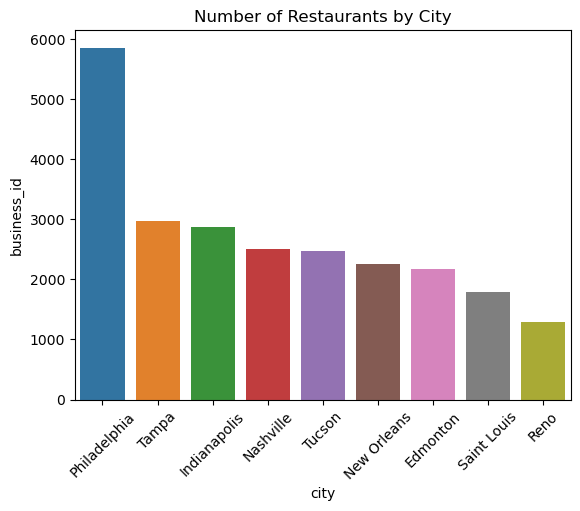

In [15]:
# create boxplot of number of restaurants by city
sns.barplot(x = cities_1kplus.index, 
            y = cities_1kplus['business_id'])
plt.xticks(rotation = 45)
plt.title('Number of Restaurants by City')
plt.show()

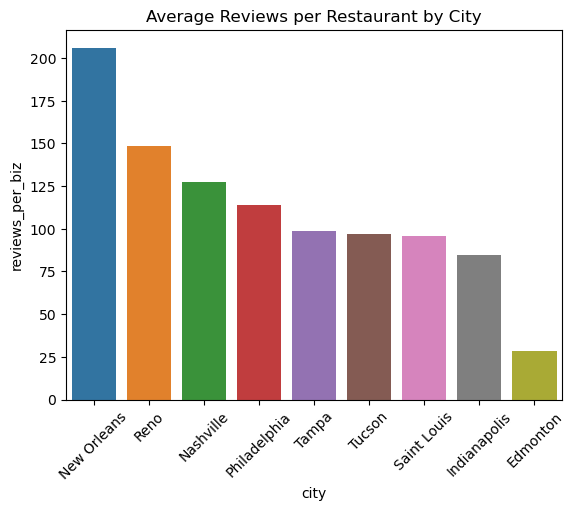

In [16]:
# create boxplot of avg reviews per restaurant by city
sns.barplot(data = cities_1kplus.sort_values(by = 'reviews_per_biz', ascending = False),
            x = cities_1kplus.sort_values(by = 'reviews_per_biz', ascending = False).index, 
            y = 'reviews_per_biz')
plt.xticks(rotation = 45)
plt.title('Average Reviews per Restaurant by City')
plt.show()

### Takeaways:

- From the above charts we see that while Philadelphia has the largest number of restaurants by a pretty large majority, New Orleans has the highest number of reviews per restaurant, indicating that the average New Orleans restaurant has more reviews than the average Philadelphia restaurant. New Orleans has an average of ~200 reviews per restaurant, whereas Philadelphia has an average of only ~114 reviews per restaurant.

The above is useful information but it's likely not sufficient in determining which city go with. I will first look at the distribution of reviews per business for these top cities:

In [17]:
# get list of cities with greater than 1k restaurants
cities = cities_1kplus.index.tolist()

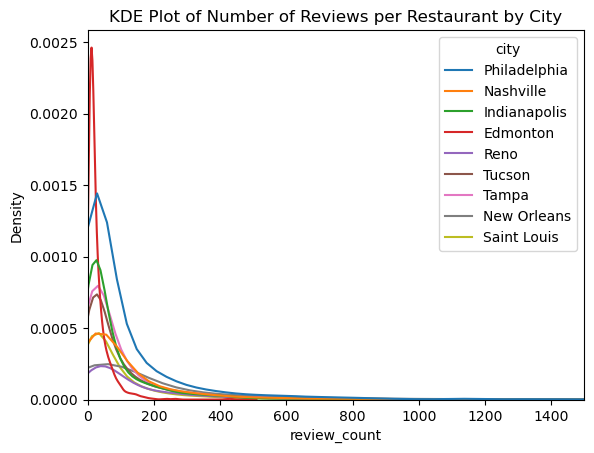

In [18]:
# filter restaurants dataframe to only include cities of interest
kde_1kplus = yelp_restaurants[(yelp_restaurants['city'].isin(cities))][['business_id', 'city', 'review_count']]

# plot the kde plot
sns.kdeplot(data = kde_1kplus, x = 'review_count', hue = 'city')

# set axes titles and x limits
plt.title('KDE Plot of Number of Reviews per Restaurant by City')
plt.xlim(0, 1500)

# display the plot
plt.show()

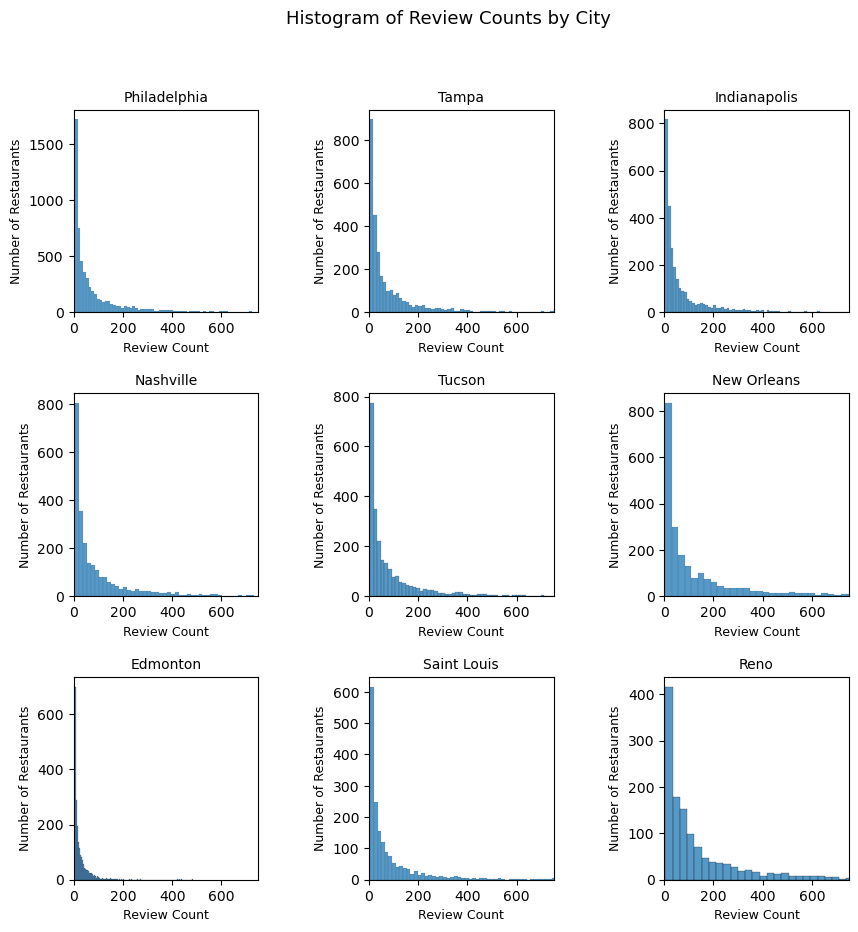

In [19]:
# generate histogram of number of reviews per restaurant by city
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i, city in enumerate(cities):
    # calculate the row and column indices for the current subplot
    row = i // 3
    col = i % 3
    
    # filter the dataset for the current city
    df_city = yelp_restaurants[(yelp_restaurants['city'] == city)][['business_id', 'review_count']]
    
    # plot the histogram in the appropriate subplot
    sns.histplot(df_city['review_count'], ax = axs[row, col])
    
    # set the title, labels, xlim and ylim for the subplot
    axs[row, col].set_title(f'{city}', fontsize = 10)
    axs[row, col].set_xlabel('Review Count', fontsize = 9)
    axs[row, col].set_ylabel('Number of Restaurants', fontsize = 9)
    axs[row, col].set_xlim(0, 750)
    
# add overall title for figure
fig.suptitle('Histogram of Review Counts by City', fontsize = 13)

# adjust the spacing between subplots
plt.subplots_adjust(hspace = 0.4, wspace = 0.6)

# display the plot
plt.show()

### Takeaways:

- As expected, the review count distribution is right-skewed, indicating that most restaurants don't have a ton of reviews. As the number of reviews increases, the number of restaurants decreases.
- Most of the cities covered 'peak' somewhere around the 0-100 mark, indicating that the majority of restaurants in these cities have between 0-100 reviews
- Edmonton has a large number of restaurants with very few, if any, reviews
- Reno and New Orleans have slightly more evenly distributed reviews per restaurant in comparison to the other cities

Next I want to look at users. A better metric of what I'm trying to determine above is likely the number of total reviews per city / the number of unique reviewers who reviewed restaurants in that city. This essentially gives the average reviews per reviewer for each city:

In [20]:
yelp_reviews = pd.read_csv('/Users/analeegraig/Documents/Semester 2/Machine Learning & Data Mining/Final Project/csv_files/yelp_review.csv')

In [21]:
yelp_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [22]:
yelp_reviews.isna().sum()

review_id      0
user_id        1
business_id    2
stars          2
useful         2
funny          2
cool           2
text           2
date           3
dtype: int64

In [23]:
# Get the number of unique reviewers by city for cities with more than 1k restaurants
nunique_reviewers_1kplus = yelp_reviews[['review_id', 'user_id', 'business_id']].merge(yelp_restaurants[yelp_restaurants['city'].isin(cities)][['business_id', 'city']],
                                                                                       on = 'business_id',
                                                                                       how = 'inner') \
                                                                                .groupby('city', as_index = False) \
                                                                                .agg({'user_id':'nunique'}) \
                                                                                .rename(columns = {'user_id': 'unique_reviewers'})

In [24]:
# Get the number of reviews by city for cities with more than 1k restaurants
nunique_reviews_1kplus = yelp_restaurants[(yelp_restaurants['city'].isin(cities))][['business_id', 'city', 'review_count']].groupby('city', as_index = False) \
                                                                                                                            .agg({'review_count':'sum'})

In [25]:
# Merge the above two tables on city
nunique_rev_revr = nunique_reviews_1kplus.merge(nunique_reviewers_1kplus, on = 'city', how = 'inner')

In [26]:
# Add a calculation for avg reviews per user
nunique_rev_revr['rev_per_user'] = nunique_rev_revr['review_count'] / nunique_rev_revr['unique_reviewers']

In [84]:
# set custom color palette
custom_palette = sns.color_palette("icefire", n_colors = 9)

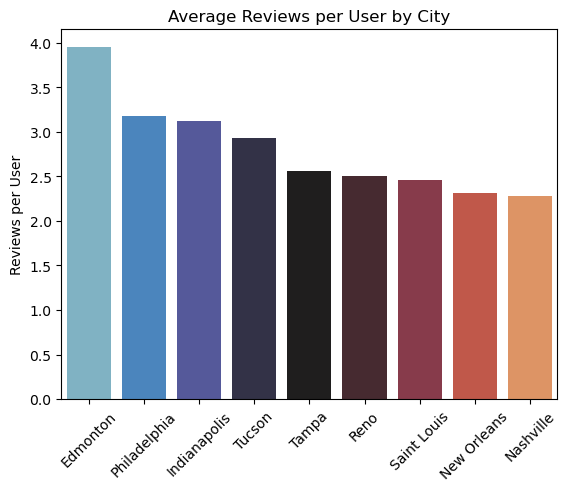

In [85]:
# create boxplot of avg reviews per restaurant by city
sns.barplot(data = nunique_rev_revr.sort_values('rev_per_user', ascending = False),
            x = 'city', 
            y = 'rev_per_user',
            palette = custom_palette)
plt.xticks(rotation = 45)
plt.title('Average Reviews per User by City')
plt.ylabel('Reviews per User')
plt.xlabel('')
plt.show()

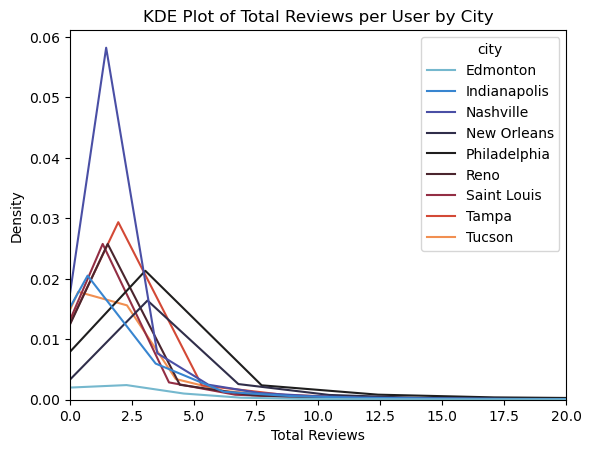

In [86]:
# filter restaurants dataframe to only include cities of interest
rev_per_user = yelp_reviews[['review_id', 'user_id', 'business_id']].merge(yelp_restaurants[yelp_restaurants['city'].isin(cities)][['business_id', 'city']], on = 'business_id', how = 'inner').groupby(['city', 'user_id'], as_index = False).agg({'review_id':'count'}).rename(columns = {'review_id':'num_reviews'})

# plot the kde plot
sns.kdeplot(data = rev_per_user, x = 'num_reviews', hue = 'city', palette = custom_palette)

# set axes titles and x limits
plt.title('KDE Plot of Total Reviews per User by City')
plt.xlabel('Total Reviews')
plt.xlim(0, 20)

# display the plot
plt.show()

### Takeaways:

- There's not a huge difference between avg reviews per user across differenct cities. Additionally, the average review per user is quite low, especially when considering the total number of restaurants in these cities. This is slightly concerning because it means we're definitely going to have an issue with sparsity
- There are likely many users writing not a ton of reviews, as the average reviews per restaurant isn't low, while the average reviews per user is quite low
- Philadelphia has a fairly similar average reviews per user in comparison to the other cities with the exception of maybe Edmonton, and nearly 2x the number of restaurants as the other cities. I think this suggests that sparsity will especially be an issue for Philadelphia
- Average reviews per restuarant in Edmonton is quite low while average reviews per user is high in comparison to the other cities. It's not clear to me what this suggests, but it's possible that there are many restaurants that don't have a ton of reviews, and the users who do review restaurants are reviewing similar restaurants. This could be not the worst situation for our recommender.
- Again I'm leaning slightly towards New Orleans for this work. While the average review per user for New Orleans is lower than the other cities, it's possible that this isn't the best metric, as the distribution of reviews per users actually peaks a bit later for New Orleans compared to other cities.

Based on the above, I think I'm leaning towards focusing on New Orleans for the recommender.

## Exploring New Orleans:

Let's first segment the restaurants dataset to only include New Orleans and do some basic exploration:

## Want to look at 'types' of users and user reviewing behavior
## Want to look at 'types' of restaurants

In [29]:
# segment dataset to be nola only
nola = yelp_restaurants[(yelp_restaurants['city'].str.lower().str.contains('orleans')) & (yelp_restaurants['state'] != 'FL')]

In [30]:
# replace 'N/A' values with NaN
nola = nola.replace('N/A', np.nan)

In [31]:
# Check percentage of columns with nulls
((nola.isna().sum()/len(nola))*100).sort_values()

business_id                                0.000000
name                                       0.000000
city                                       0.000000
state                                      0.000000
latitude                                   0.000000
longitude                                  0.000000
stars                                      0.000000
review_count                               0.000000
is_open                                    0.000000
categories                                 0.000000
postal_code                                0.044209
address                                    1.724138
attributes.BusinessAcceptsCreditCards      7.648099
attributes.RestaurantsTakeOut              8.664898
attributes.BusinessParking                10.742706
attributes.RestaurantsDelivery            11.317418
attributes.OutdoorSeating                 12.201592
attributes.RestaurantsPriceRange2         13.925729
hours.Friday                              14.809903
hours.Thursd

### Next I want to look at the different categories associated with restaurants in New Orleans:

In [32]:
# subset nola restaurants dataset
nolaCat = nola[['business_id', 'name', 'address', 
                'postal_code', 'latitude', 'longitude', 
                'stars', 'review_count', 'categories']]

In [33]:
# create empty dictionary to store categories and counts
nolaCategoryCount = {}

In [34]:
# loop through categories and count the number of times each category appears
for val in nolaCat['categories']:
    for category in val.split(', '):
        if category == 'Restaurants':
            break
        if category in nolaCategoryCount:
            nolaCategoryCount[category] += 1
        else:
            nolaCategoryCount[category] = 1

In [35]:
# create dataframe from categories dictionary
nolaCategory = pd.DataFrame \
                 .from_dict(nolaCategoryCount, orient = 'index', columns = ['count']) \
                 .sort_values(by = 'count', ascending = False)

In [36]:
# add column for percentage of total restaurants 
nolaCategory['pctTotalRest'] = round((nolaCategory['count']/len(nola))*100,2)

In [88]:
# summary statistics
nolaCategory.describe()

,count,pctTotalRest
count,258.000000,258.000000
mean,17.422481,0.768721
std,42.588930,1.883307
min,1.000000,0.040000
25%,1.000000,0.040000
50%,3.000000,0.130000
75%,13.000000,0.570000
max,361.000000,15.960000


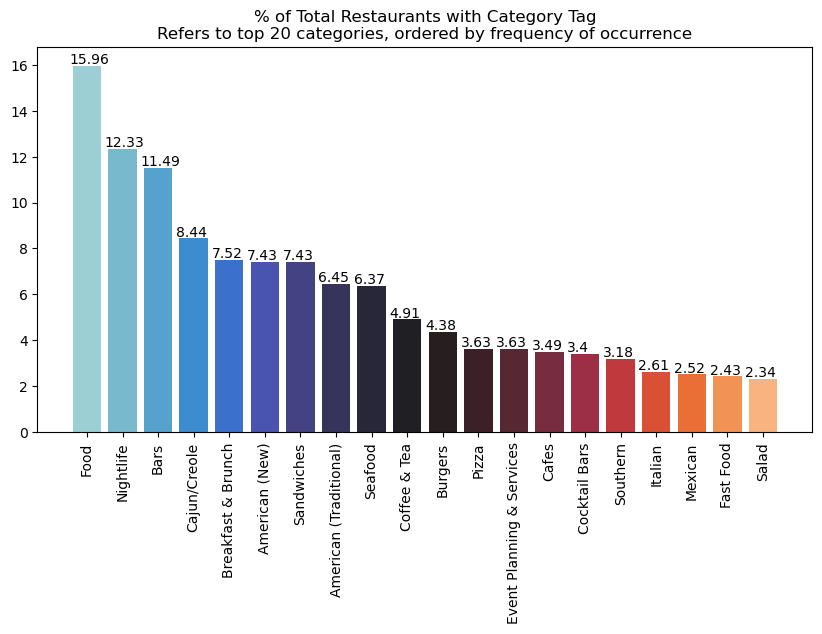

In [94]:
custom_palette = sns.color_palette("icefire", n_colors=20)
plt.figure(figsize=(10, 5))
plt.bar(x=nolaCategory[:20].index.values, height=nolaCategory['pctTotalRest'][:20], color=custom_palette)
xlocs, xlabs = plt.xticks()
plt.xticks(rotation=90)
for i, v in enumerate(nolaCategory['pctTotalRest'][:20]):
    plt.text(xlocs[i] - 0.5, v + 0.1, str(v))
plt.title('% of Total Restaurants with Category Tag\nRefers to top 20 categories, ordered by frequency of occurrence')
plt.show()

### Takeaways:

- Unsurprisingly, the distribution of category tags is right-skewed, with the majority of tags having very few restaurants with that tag
- The tag with the highest % of restaurants is 'Food', which is vague bordering on useless. I wonder if this tag is mainly used for bars, as 'Food' would really only be a meaningful tag for bars or nightlife establishments.
- The second and third highest categories are 'Nightlife' and 'Bars', which makes sense given the prominence of New Orleans nightlife. Subsequent categories are different kinds of food. Again unsurprising that Cajun/Creole is so high, but also kind of cool that it's the most tagged cuisine related category.

### Next, I want to look at the average ratings for different categories of restaurant:

In order to do that, I will need to create new columns for each of the categories, and for each row, have a 1 if 'categories' contains that category, and 0 if not:

In [40]:
nolaCatAvg = nolaCat.copy()

In [41]:
# create empty set to store categories in
categories = set()

# iterate through each category in the categories column and add it to the categories set
for i, val in enumerate(nolaCatAvg['categories']):
    for category in val.split(', '):
        categories.add(category)
        
# create empty dictionary to store categories and whether or not each row value is tagged as that category in
catDict = {}

# add each category in the categories set to the catDict
for category in categories:
    catDict[category] = []
    
# loop through each category in the categories column of the nola dataframe
# add 1 to catDict for each category in that column. if the category is not there, add 0
for i, val in enumerate(nolaCatAvg['categories'], 1):
    for category in val.split(', '):
        if category in catDict.keys():
            catDict[category].append(1)
    for key in catDict:
        if len(catDict[key]) < i:
            catDict[key].append(0)
        else:
            pass
        
# create dataframe from catDict and join it to the nola dataset
nolaCatAvg.reset_index(inplace = True, drop = True)
nolaCatAvg = pd.concat([nolaCatAvg, pd.DataFrame.from_dict(catDict)], axis = 1)

In [42]:
nolaCatAvg.head(2)

,business_id,name,address,postal_code,latitude,longitude,stars,review_count,categories,Cabaret,...,Golf,Popcorn Shops,Candy Stores,Beer,Boat Tours,Sporting Goods,Heating & Air Conditioning/HVAC,Walking Tours,Buffets,Turkish
0,YNjyv0gfOr2g8lbmUpTnKg,Copper Vine,1001 Poydras St,70112,29.950647,-90.074427,4.5,350,"Nightlife, Pubs, Event Planning & Services, Wi...",0,...,0,0,0,0,0,0,0,0,0,0
1,TLZ3-eDPLhUzfsWO4ad6Ug,Mahony's Po-Boys & Seafood,901 Iberville St,70112,29.955415,-90.070062,4.0,382,"Restaurants, Seafood, Cajun/Creole",0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
nolaCatAvg.iloc[:, 6:].drop('categories', axis = 1).groupby(nolaCatAvg.iloc[:, 9:].columns.tolist()[0:5])['stars'].mean().reset_index().head(2)

,Cabaret,Public Services & Government,Diners,Argentine,Boating,stars
0,0,0,0,0,0,3.747626
1,0,0,0,0,1,3.500000


Unfortunately the above doesn't give me what I want. Maybe I'll need it once I dump this into sklearn, but for now I think I actually want to explode categories so I can group them:

In [44]:
# create copy of dataframe
nolaCatGrouped = nolaCat.copy().reset_index()

In [45]:
# make categories column a list value rather than string
nolaCatGrouped['categories'] = nolaCatGrouped.categories.apply(lambda x: x.split(', '))

In [46]:
# explode categories
nolaCatGrouped = nolaCatGrouped.explode('categories')

In [47]:
# group by category and take weighted average of each category
nolaCatGrouped = nolaCatGrouped.groupby('categories')[['stars', 'review_count']] \
                               .agg(weighted_avg = ('stars', 
                                                    lambda x: (x * nolaCatGrouped.loc[x.index, 'review_count']).sum() / nolaCatGrouped.loc[x.index, 'review_count'].sum()),
                                                    count = ('stars', 'count')) \
                               .sort_values(by = 'count', ascending = False)

Next I want to look at the distribution of the number of restaurants with each tag. I will likely filter out tags if the total restaurant count is under a certain threshold:

In [48]:
nolaCatGrouped['count'].describe()

count     305.000000
mean       37.763934
std       151.029047
min         1.000000
25%         1.000000
50%         4.000000
75%        22.000000
max      2261.000000
Name: count, dtype: float64

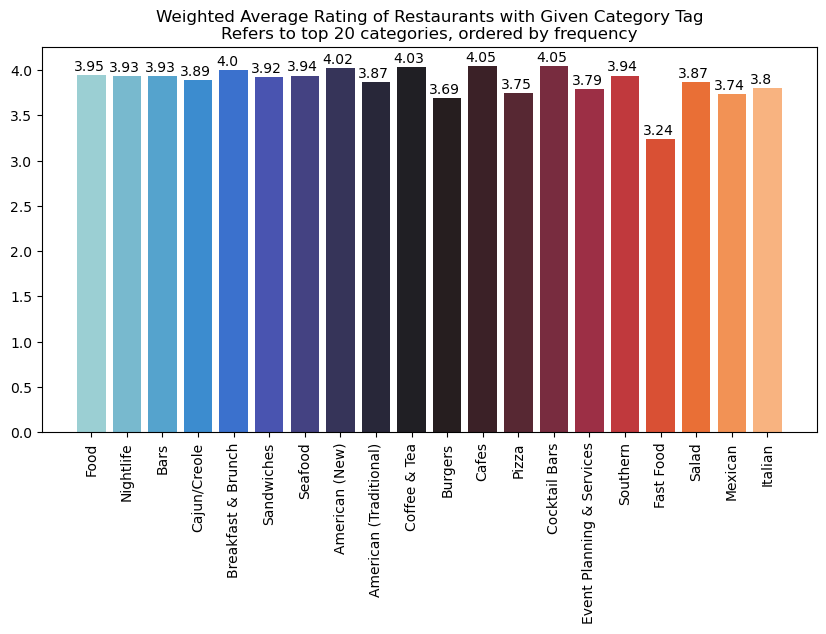

In [95]:
custom_palette = sns.color_palette("icefire", n_colors=20)
plt.figure(figsize=(10, 5))
plt.bar(x=nolaCatGrouped[1:21].index.values, height=round(nolaCatGrouped['weighted_avg'][1:21], 2), color=custom_palette)
xlocs, xlabs = plt.xticks()
plt.xticks(rotation=90)
for i, v in enumerate(round(nolaCatGrouped['weighted_avg'][1:21], 2)):
    plt.text(xlocs[i] - 0.5, v + 0.05, str(v))
plt.title('Weighted Average Rating of Restaurants with Given Category Tag\nRefers to top 20 categories, ordered by frequency')
plt.show()

### Takeaways:

1. I just did a ton of work to generate the above graph that unfortunately isn't particularly useful. It tells us something that for the most part we already know, which is that the average star rating of a restaurants is generally quite good.
2. The lowest average rating is Fast Food, which has a weighted average of 3.24. Restaurants tagged as having 'Burgers', 'Mexican' and 'Pizza' have the second, third and fourth lowest ratings. My guess is that this is because of fast food restaurants like Mcdonalds, Taco Bell and Dominos, etc. bringing the average rating down.
3. Likely we will have an issue with imbalanced classes. I'm curious to see how the recommender handles this. Likely we will need to make use of the reviews.

Next, I want to look at users:

In [50]:
# create copy of dataframe with categories
nolaCatAvg2 = nolaCatAvg.drop('categories', axis=1)

In [51]:
# merge businesses dataframe with reviews dataframe
nolaReviewsBiz = nolaCatAvg2.merge(yelp_reviews, how = 'left', on = 'business_id')

In [52]:
# check number of unique users
nolaReviewsBiz['user_id'].nunique()

201869

In [53]:
# create grouped dataframe of average rating, median rating and the number of rated restaurants by user
nolaUserReviewStats = nolaReviewsBiz.groupby('user_id', as_index = False)[['stars_y', 'business_id']].agg(avgRating = ('stars_y','mean'), 
                                                                                                          medRating = ('stars_y','median'), 
                                                                                                          numReviews = ('business_id','count'))

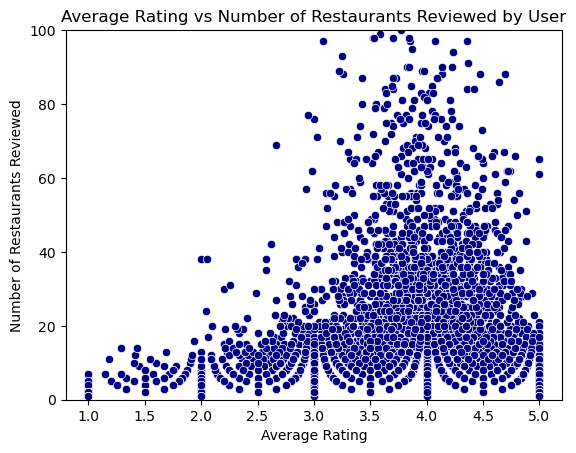

In [101]:
# Create a scatter plot with navy blue points
sns.scatterplot(data=nolaUserReviewStats, x='avgRating', y='numReviews', color='navy')

plt.xlabel('Average Rating')
plt.ylabel('Number of Restaurants Reviewed')
plt.title('Average Rating vs Number of Restaurants Reviewed by User')
plt.ylim((0, 100))

plt.show()

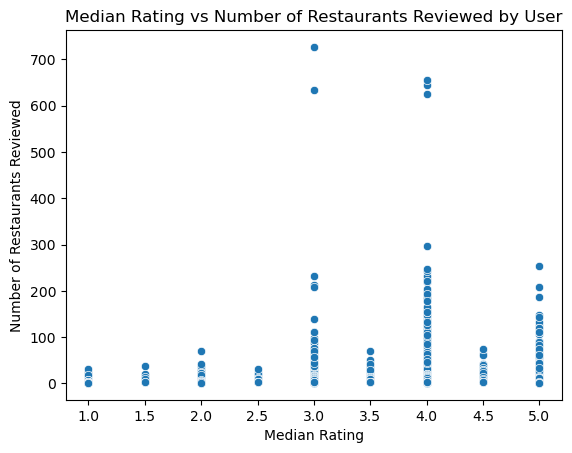

In [55]:
# visualize median rating vs number of restaurants reviewed
sns.scatterplot(data = nolaUserReviewStats, x = 'medRating', y = 'numReviews')
plt.xlabel('Median Rating')
plt.ylabel('Number of Restaurants Reviewed')
plt.title('Median Rating vs Number of Restaurants Reviewed by User')
plt.show()

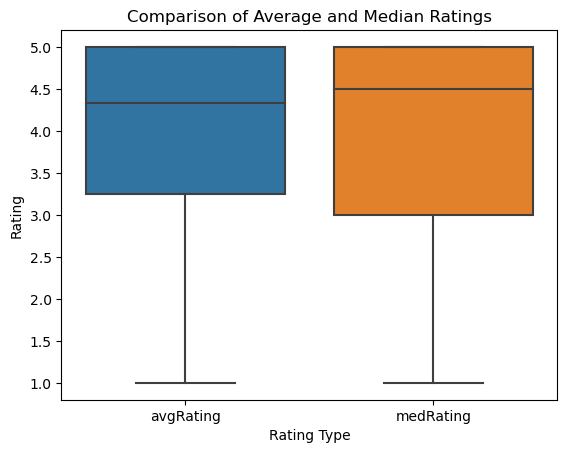

In [56]:
# visualize median and average rating distribution
sns.boxplot(data = nolaUserReviewStats[['avgRating', 'medRating']], orient='v')
plt.xlabel('Rating Type')
plt.ylabel('Rating')
plt.title('Comparison of Average and Median Ratings')
plt.show()

### Takeaways:

- From the above we can see that the vast majority of users have an average and median rating of about 4.5. Interestingly, there appears to be a slight relationship between the number of restaurants a user has reviewed and their average and median ratings. The more restaurants a user reviewed, the more likely they were to have rated restaurants well.
- Funnily enough, there is a small population of users who I'd call 'haters', who have fairly low average and median ratings (between 0-2). All of these uers have rated less than 40 restaurants.

Next I'm interested in whether or not users are loyal to particular restaurant categories. For example, do users strongly rate one or certain categories over others?

In [57]:
# create dictionary of values to aggregate on and assign aggregation method
categories = nolaReviewsBiz.columns.tolist()[8:313]
categories.append('business_id')

valDict = {}

for val in categories:
    if val != 'business_id':
        valDict[val] = 'sum'
    else:
        valDict[val] = 'count'

In [58]:
# see what percentage users rated what number of restaurants
print(nolaReviewsBiz.groupby('user_id')[categories].agg(valDict)['business_id'] \
                    .value_counts()/nolaReviewsBiz['user_id'] \
                    .nunique())

1      0.612417
2      0.169655
3      0.078779
4      0.044108
5      0.027508
         ...   
184    0.000005
204    0.000005
126    0.000005
109    0.000005
132    0.000005
Name: business_id, Length: 162, dtype: float64


### Takeaways: 

- It's slightly concerning that just over 60% of users rated only one restaurant
- Less than 10% of users have rated 5 or more restaurants
- It might not even make sense to look at category loyalty given the majority of users have only reviewed one restaurant

**Other ideas**:
1. topic modeling on categories column
2. turn attributes into a list -- like acceptscreditcards, hipster, etc. and do topic modeling on this
3. topic modeling on reviews

--- goal of the above is basically to better identify attributes of restaurants to better inform recommender